# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML


%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [103]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_2 = sinasc[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_2

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27023,32,35.0,Vilhena
27024,19,NaN,Chupinguaia
27025,24,30.0,Vilhena
27026,21,24.0,Vilhena


In [5]:
sinasc_2.groupby('munResNome').agg('mean')

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [7]:
sinasc_3 = sinasc[['SEXO', 'PESO', 'ESCMAE', 'DTNASC']]

In [8]:
# Filtrando os dados para a data específica
sinasc_3 = sinasc_3[sinasc_3['DTNASC'] == '2019-11-05']
sinasc_3

,SEXO,PESO,ESCMAE,DTNASC
14708,Feminino,2930,12 anos ou mais,2019-11-05
14752,Feminino,2720,1 a 3 anos,2019-11-05
14753,Feminino,2900,4 a 7 anos,2019-11-05
14754,Masculino,2820,1 a 3 anos,2019-11-05
14795,Masculino,4036,12 anos ou mais,2019-11-05
...,...,...,...,...
26732,Masculino,3360,4 a 7 anos,2019-11-05
26733,Masculino,3720,8 a 11 anos,2019-11-05
26926,Masculino,3424,8 a 11 anos,2019-11-05
26927,Masculino,1406,4 a 7 anos,2019-11-05


In [9]:
# Agrupando os dados por sexo e escolaridade da mãe e calculando a média do peso
peso_medio_por_grupo = sinasc_3.groupby(['SEXO', 'ESCMAE'])['PESO'].mean()

# Exibindo o resultado
print(peso_medio_por_grupo)

SEXO       ESCMAE         
Feminino   1 a 3 anos         2720.000000
           12 anos ou mais    3426.846154
           4 a 7 anos         3387.777778
           8 a 11 anos        2903.941176
Masculino  1 a 3 anos         2820.000000
           12 anos ou mais    3305.000000
           4 a 7 anos         3185.125000
           8 a 11 anos        3454.590909
Name: PESO, dtype: float64


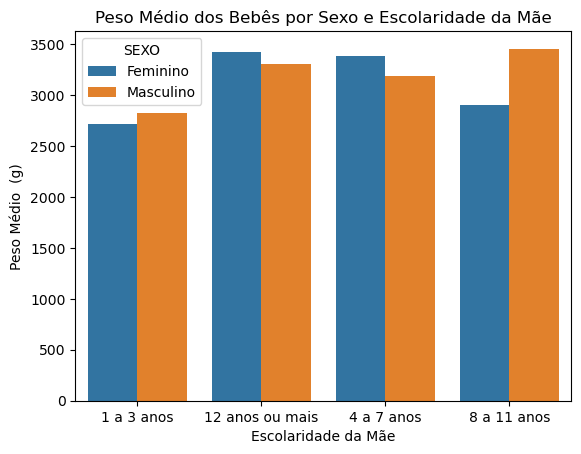

In [10]:
# Criando o gráfico de barras bivariado
sns.barplot(x='ESCMAE', y='PESO', hue='SEXO', data=peso_medio_por_grupo.reset_index())
plt.title('Peso Médio dos Bebês por Sexo e Escolaridade da Mãe')
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Peso Médio  (g)')
plt.show()

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

##### 3) R:

In [11]:
sinasc_4 = sinasc_2
sinasc_4

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27023,32,35.0,Vilhena
27024,19,NaN,Chupinguaia
27025,24,30.0,Vilhena
27026,21,24.0,Vilhena


In [12]:
df_order = sinasc_4.groupby('munResNome').agg('count').sort_values(by = ['IDADEMAE'], ascending = False)
df_order

,IDADEMAE,IDADEPAI
munResNome,,
Porto Velho,8437,672
Ji-Paraná,2182,1036
Ariquemes,1729,15
Vilhena,1590,170
Cacoal,1374,1262
Rolim de Moura,927,835
Jaru,881,142
Guajará-Mirim,781,17
Ouro Preto do Oeste,631,373


In [32]:
top_municipio = df_order.index[0]

print(f"O município com mais nascimentos é: {top_municipio}")

O município com mais nascimentos é: Porto Velho


##### 3.1) R:

In [44]:
df_order_first = sinasc_4[sinasc_4['munResNome'] == f'{top_municipio}'].copy()
df_order_first

,IDADEMAE,IDADEPAI,munResNome
123,22,NaN,Porto Velho
201,22,NaN,Porto Velho
246,29,NaN,Porto Velho
272,27,NaN,Porto Velho
355,33,NaN,Porto Velho
...,...,...,...
26986,35,NaN,Porto Velho
26991,29,NaN,Porto Velho
26995,34,38.0,Porto Velho
26999,35,NaN,Porto Velho


In [41]:
df_order_first.fillna(0, inplace=True)
df_order_first

,IDADEMAE,IDADEPAI,munResNome
123,22,0.0,Porto Velho
201,22,0.0,Porto Velho
246,29,0.0,Porto Velho
272,27,0.0,Porto Velho
355,33,0.0,Porto Velho
...,...,...,...
26986,35,0.0,Porto Velho
26991,29,0.0,Porto Velho
26995,34,38.0,Porto Velho
26999,35,0.0,Porto Velho


In [72]:
estatisticas_mae = df_order_first['IDADEMAE'].agg(['mean', 'min', 'max'])

In [73]:
print(f'''
A idade média das mães do município é: {int(estatisticas_mae.loc['mean'])} anos
A idade Mínima entre as mães do município foi: {estatisticas_mae.loc['min']} anos
A idade da mãe mais velha registrada no município é de: {estatisticas_mae.loc['max']} anos
''')


A idade média das mães do município é: 26 anos
A idade Mínima entre as mães do município foi: 12.0 anos
A idade da mãe mais velha registrada no município é de: 47.0 anos



##### 3.2) R:

In [74]:
estatisticas_pai = df_order_first['IDADEPAI'].agg(['mean', 'min', 'max'])

In [76]:
print(f'''
A idade média dos pais do município é: {int(estatisticas_pai.loc['mean'])} anos
A idade Mínima entre os pais do município foi: {estatisticas_pai.loc['min']} anos
A idade do pai mais velho registrado no município é de: {estatisticas_pai.loc['max']} anos
''')


A idade média dos pais do município é: 32 anos
A idade Mínima entre os pais do município foi: 16.0 anos
A idade do pai mais velho registrado no município é de: 65.0 anos



### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



##### 4) R:

In [82]:
sinasc_filtrad = sinasc[['munResNome','IDADEPAI', 'QTDFILVIVO', 'DTNASC']].copy()
sinasc_filtrad

,munResNome,IDADEPAI,QTDFILVIVO,DTNASC
0,Alta Floresta D'Oeste,26.0,0.0,2019-02-19
1,Alta Floresta D'Oeste,24.0,1.0,2019-02-21
2,Alta Floresta D'Oeste,32.0,2.0,2019-02-25
3,Alto Alegre dos Parecis,24.0,0.0,2019-03-20
4,Alta Floresta D'Oeste,27.0,1.0,2019-03-23
...,...,...,...,...
27023,Vilhena,35.0,1.0,2019-12-13
27024,Chupinguaia,NaN,0.0,2019-10-04
27025,Vilhena,30.0,0.0,2019-08-02
27026,Vilhena,24.0,1.0,2019-12-23


In [83]:
# Convertendo a coluna DTNASC para formato de data
sinasc_filtrad['DTNASC'] = pd.to_datetime(sinasc_filtrad['DTNASC'])

In [84]:
# Filtrando os dados para o mês de março
sinasc_marco = sinasc_filtrad[sinasc_filtrad['DTNASC'].dt.month == 3]

In [91]:
# Agrupando por município e contando o número de nascimentos
contagem_por_municipio = sinasc_marco.groupby('munResNome').size().reset_index(name='total_nascimentos')

# Ordenando os resultados em ordem decrescente de nascimentos
cont_municipio = contagem_por_municipio.sort_values('total_nascimentos', ascending=False)

cont_municipio

,munResNome,total_nascimentos
36,Porto Velho,744
23,Ji-Paraná,188
51,Vilhena,148
4,Ariquemes,141
8,Cacoal,133
22,Jaru,80
20,Guajará-Mirim,75
40,Rolim de Moura,69
32,Ouro Preto do Oeste,67
34,Pimenta Bueno,62


In [92]:
# Exibindo o município com o maior número de nascimentos em março
top_municipio_nascimentos = cont_municipio.iloc[0]['munResNome']
print(f"O município com o maior número de nascimentos em março é: {top_municipio_nascimentos}")

O município com o maior número de nascimentos em março é: Porto Velho


##### 4.1) R:

In [99]:
sinasc_top = sinasc_marco[sinasc_marco['munResNome'] == f'{top_municipio_nascimentos}']

estatistic_filhovivo = sinasc_top['QTDFILVIVO'].agg(['mean', 'min', 'max'])


print(f'''
A quantia média das filhos vivos do município é: {int(estatistic_filhovivo.loc['mean'])} 
O menor número de filhos vivos do município foi: {estatistic_filhovivo.loc['min']}
A o máximo de filhos vivos registrados no município é de: {estatistic_filhovivo.loc['max']}
''')


A quantia média das filhos vivos do município é: 1 
O menor número de filhos vivos do município foi: 0.0
A o máximo de filhos vivos registrados no município é de: 9.0



##### 4.2) R:

In [101]:
estatistic_pai = sinasc_top['IDADEPAI'].agg(['mean', 'max', 'min'])

print(f'''
A idade média dos pais do município é: {int(estatistic_pai.loc['mean'])} anos
A idade Mínima entre os pais do município foi: {estatistic_pai.loc['min']} anos
A idade do pai mais velho registrado no município é de: {estatistic_pai.loc['max']} anos
''')


A idade média dos pais do município é: 34 anos
A idade Mínima entre os pais do município foi: 19.0 anos
A idade do pai mais velho registrado no município é de: 62.0 anos



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [69]:
sinasc.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [70]:
sinasc.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [71]:
sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

### Analisando as Relações entre Variáveis no DataFrame SINASC
##### Idade da Mãe x Quantidade de Filhos
    Hipótese: Esperamos que haja uma correlação positiva entre a idade da mãe e a quantidade de filhos, ou seja, que mães mais velhas tendam a ter mais filhos. No entanto, outros fatores sociais, econômicos e culturais podem influenciar essa relação.

In [127]:
# Agrupando os dados por idade da mãe e calculando a soma de filhos vivos
qtd_filhos = sinasc.groupby('IDADEMAE')['QTDFILVIVO'].mean().reset_index()

In [128]:
qtd_filhos

,IDADEMAE,QTDFILVIVO
0,11,NaN
1,12,0.000000
2,13,0.080000
3,14,0.034247
4,15,0.083056
5,16,0.155914
6,17,0.195517
7,18,0.295704
8,19,0.405250
9,20,0.555970


C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


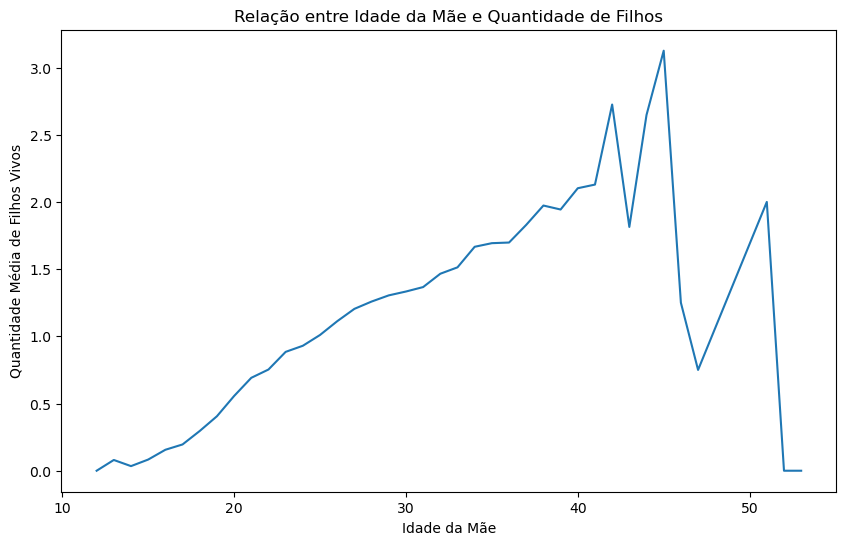

In [129]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='IDADEMAE', y='QTDFILVIVO', data=qtd_filhos)
plt.xlabel('Idade da Mãe')
plt.ylabel('Quantidade Média de Filhos Vivos')
plt.title('Relação entre Idade da Mãe e Quantidade de Filhos')
plt.show()

##### Conclusão: 
    Podemos observar a maioria das mães que possuem mais de dois filhos tem 40 anos ou mais.

##### Tipo de Parto x Gestação
    Hipótese: Esperamos que a duração da gestação seja menor em casos de parto cesáreo, devido à indicação cirúrgica em muitas situações.

In [109]:
# Agrupando os dados por tipo de parto e calculando a média da gestação
parto_gestacao = sinasc.groupby('PARTO')['SEMAGESTAC'].mean().reset_index()

In [111]:
parto_gestacao

,PARTO,SEMAGESTAC
0,Cesáreo,38.534895
1,Vaginal,38.635608


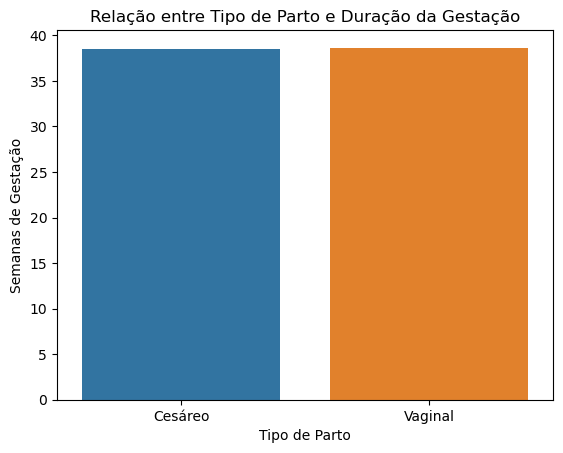

In [110]:
sns.barplot(x='PARTO', y='SEMAGESTAC', data=parto_gestacao)
plt.xlabel('Tipo de Parto')
plt.ylabel('Semanas de Gestação')
plt.title('Relação entre Tipo de Parto e Duração da Gestação')
plt.show()

#### Conclusão:
    A média de semanas de gestação para 